# Soal nomor 30 
1. Write a program that uses the thinning algorithm to generate the first 10 time units of a nonhomogeneous Poisson process with intensity function   
$$
\lambda (t) = 3 +\frac{4}{t+1}
$$  
2. Give a way to improve upon the thinning algorithm for this example  

# Jawab 

Step 1: $t = 0$, $I = 0$.  
step 2: Generate a random number $U$.  
step 3: $t = t − \frac{1}{\lambda} \log U$. If $t > T$ , stop.  
step 4: Generate a random number $U$.  
step 5: If $U \leq \frac{\lambda(t)}{\lambda}$, set $I = I + 1$, $S(I) = t$.  
step 6: Go to Step 2.  
  
$$
\lambda(t) \leq \lambda \quad \forall t \leq T
$$
Perhatikan bahwa $T = 0$ maka dapat dipilih $\lambda \geq 7$ 

Variabel :
- $T$ : banyaknya kejadian  
- $S(i)$ : nilai pada saat $i$ dengan $i = 1,\dots,I$ 

Jika dipandang proses ini berdistribusi Poisson dengan $\lambda(t)$ dan maka dapat diapproksimasi total rataannya $\leq 39.5$

In [1]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def poisson(T = 10, lambda_ =7, sim = 10000):
    hist = []
    for i in range(sim):
        t = 0 
        I = 0
        S = [0]
        count = 0
        lambda_t = lambda t:3+4/(t+1)
        while t<=T:
            t = t - 1/lambda_ *np.log(np.random.rand())
            if np.random.rand()<= lambda_t(t)/lambda_:
                I += 1
                S.append(t)
                count += 1
                hist.append(t)
    plt.hist(hist,density=True,bins = 30)
    sns.kdeplot(hist)
    plt.grid()
    plt.title(f'Distribusi dari nilai yang dihasilkan dengan simulasi sebanyak {sim}')
    plt.show()
    return print(f'Rataan dari banyaknya percobaan adalah {np.mean(hist)} dan variansinya adalah {np.var(hist)}')

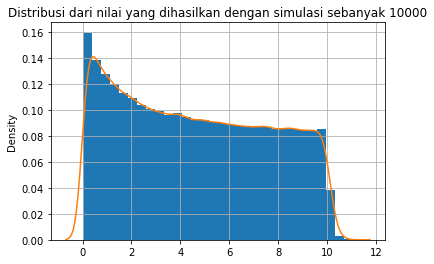

Rataan dari banyaknya percobaan adalah 4.621588443824721 dan variansinya adalah 9.044887597037462


In [3]:
a = poisson(sim = 10000)

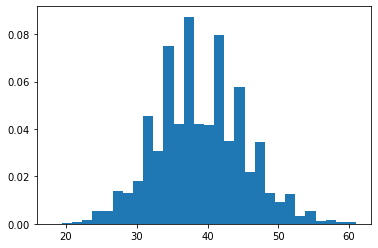

In [4]:
h = np.random.poisson(39,10000)
plt.hist(h,density=True,bins=30)
plt.show()

In [5]:
def poisson_2(T = 10, lambda_ = 37/11, sim = 10000):
    hist = []
    for i in range(sim):
        t = 0 
        I = 0
        S = [0]
        count = 0
        lambda_t = lambda t:3+4/(t+1)
        while t<=T:
            t = t - 1/lambda_ *np.log(np.random.rand())
            if np.random.rand()<= lambda_t(t)/lambda_:
                I += 1
                S.append(t)
                count += 1
        hist.append(count)
    plt.hist(hist,density=True,bins = 30)
    sns.kdeplot(hist)
    plt.grid()
    plt.title(f'Distribusi dari banyak Percobaan yang dilakukan dengan simulasi sebanyak {sim}')
    plt.show()
    return print(f'Rataan dari banyaknya percobaan adalah {np.mean(hist)} dan variansinya adalah {np.var(hist)}')